### ML Model for predicting Employee Exit.
- Dataset Link https://github.com/tranghth-lux/data-science-complete-tutorial/blob/master/Data/HR_comma_sep.csv.txt
- Target Column - 'left' (0/1) represents exit or not.
- Data is heterogeneous in nature.
- Build a model to predict left column.

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
round(df.describe(),2)

satisfaction_level  last_evaluation  number_project  \
count            14999.00         14999.00        14999.00   
mean                 0.61             0.72            3.80   
std                  0.25             0.17            1.23   
min                  0.09             0.36            2.00   
25%                  0.44             0.56            3.00   
50%                  0.64             0.72            4.00   
75%                  0.82             0.87            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  Work_accident      left  \
count              14999.00            14999.00       14999.00  14999.00   
mean                 201.05                3.50           0.14      0.24   
std                   49.94                1.46           0.35      0.43   
min                   96.00                2.00           0.00      0.00   
25%                  156.00                3.00           0.00      0.00   
50%                  200.00                3.00           0.00      0.00   
75%                  245.00                4.00           0.00      0.00   
max                  310.00               10.00           1.00      1.00   

       promotion_last_5years  
count               14999.00  
mean                    0.02  
std                     0.14  
min                     0.00  
25%                     0.00  
50%                     0.00  
75%                     0.00  
max                     1.00

In [5]:
# Check for categorical and numerical features
categorical = [var for var in df.columns if df[var].dtype == 'O']
numerical = [var for var in df.columns if df[var].dtype != 'O']
print(f"categorical : {categorical}")
print(f"numerical : {numerical}")

categorical : ['sales', 'salary']
numerical : ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


In [6]:
# check for unique values
for var in df.columns:
    print(f"{df[var].name} : {df[var].unique()}")

satisfaction_level : [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation : [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project : [2 5 7 6 4 3]
average_montly_hours : [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294

In [7]:
# Check for null values
for var in df.columns:
    print(f"{df[var].name} : {df[var].isnull().sum()}")

satisfaction_level : 0
last_evaluation : 0
number_project : 0
average_montly_hours : 0
time_spend_company : 0
Work_accident : 0
left : 0
promotion_last_5years : 0
sales : 0
salary : 0


In [8]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
df['encoded_sales'] = en.fit_transform(df['sales'])
df['encoded_salary'] = en.fit_transform(df['salary'])

In [9]:
# Drop the non-required columns 
df.drop(['sales','salary'],axis=1,inplace=True)

In [10]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years  encoded_sales  encoded_salary  
0                          0              7               1  
1                          0              7               2  
2                          0              7               2  
3                          0              7               1  
4                          0              7               1  
...                      ...            ...             ...  
14994                      0              8               1  
14995                      0              8               1  
14996                      0              8               1  
14997                      0              8               1  
14998                      0              8               1  

[14999 rows x 10 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   encoded_sales          14999 non-null  int64  
 9   encoded_salary         14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [12]:
px.pie(data_frame=df,values='encoded_sales',names='encoded_sales')

<Axes: >

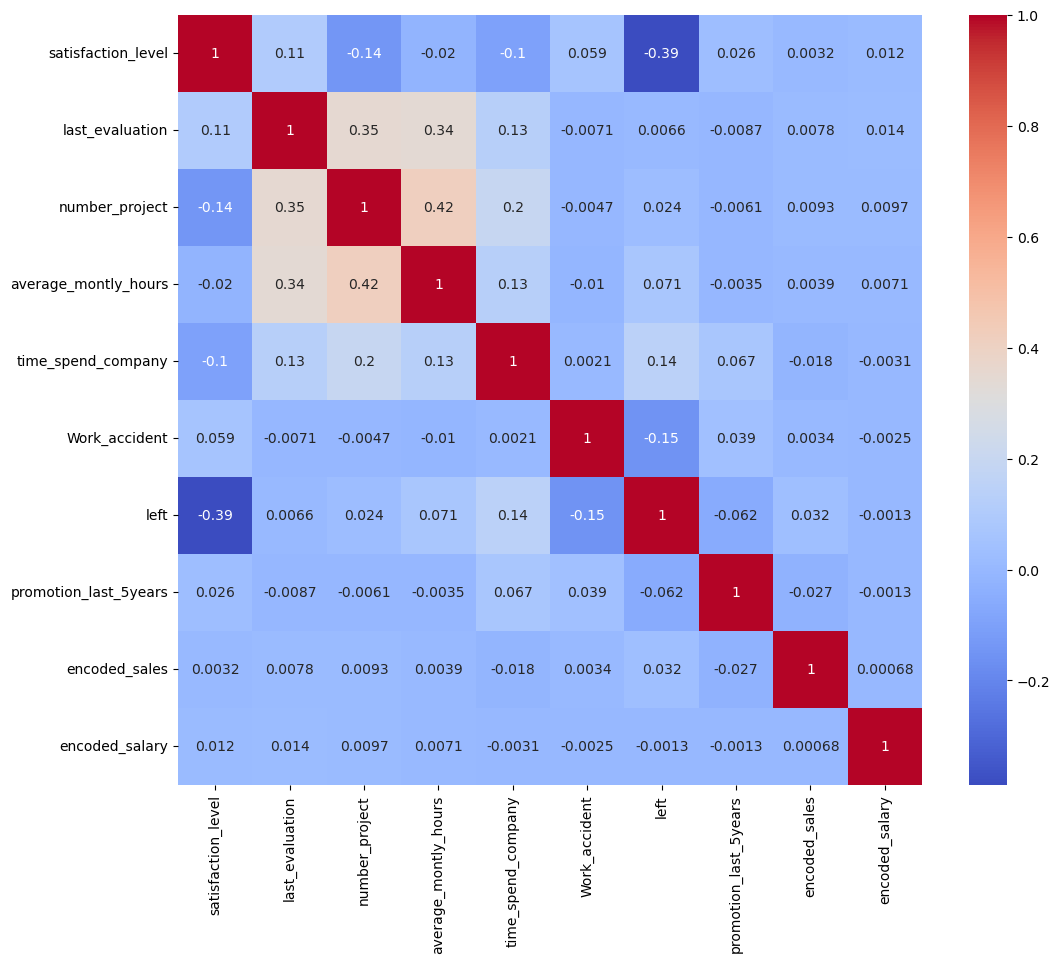

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



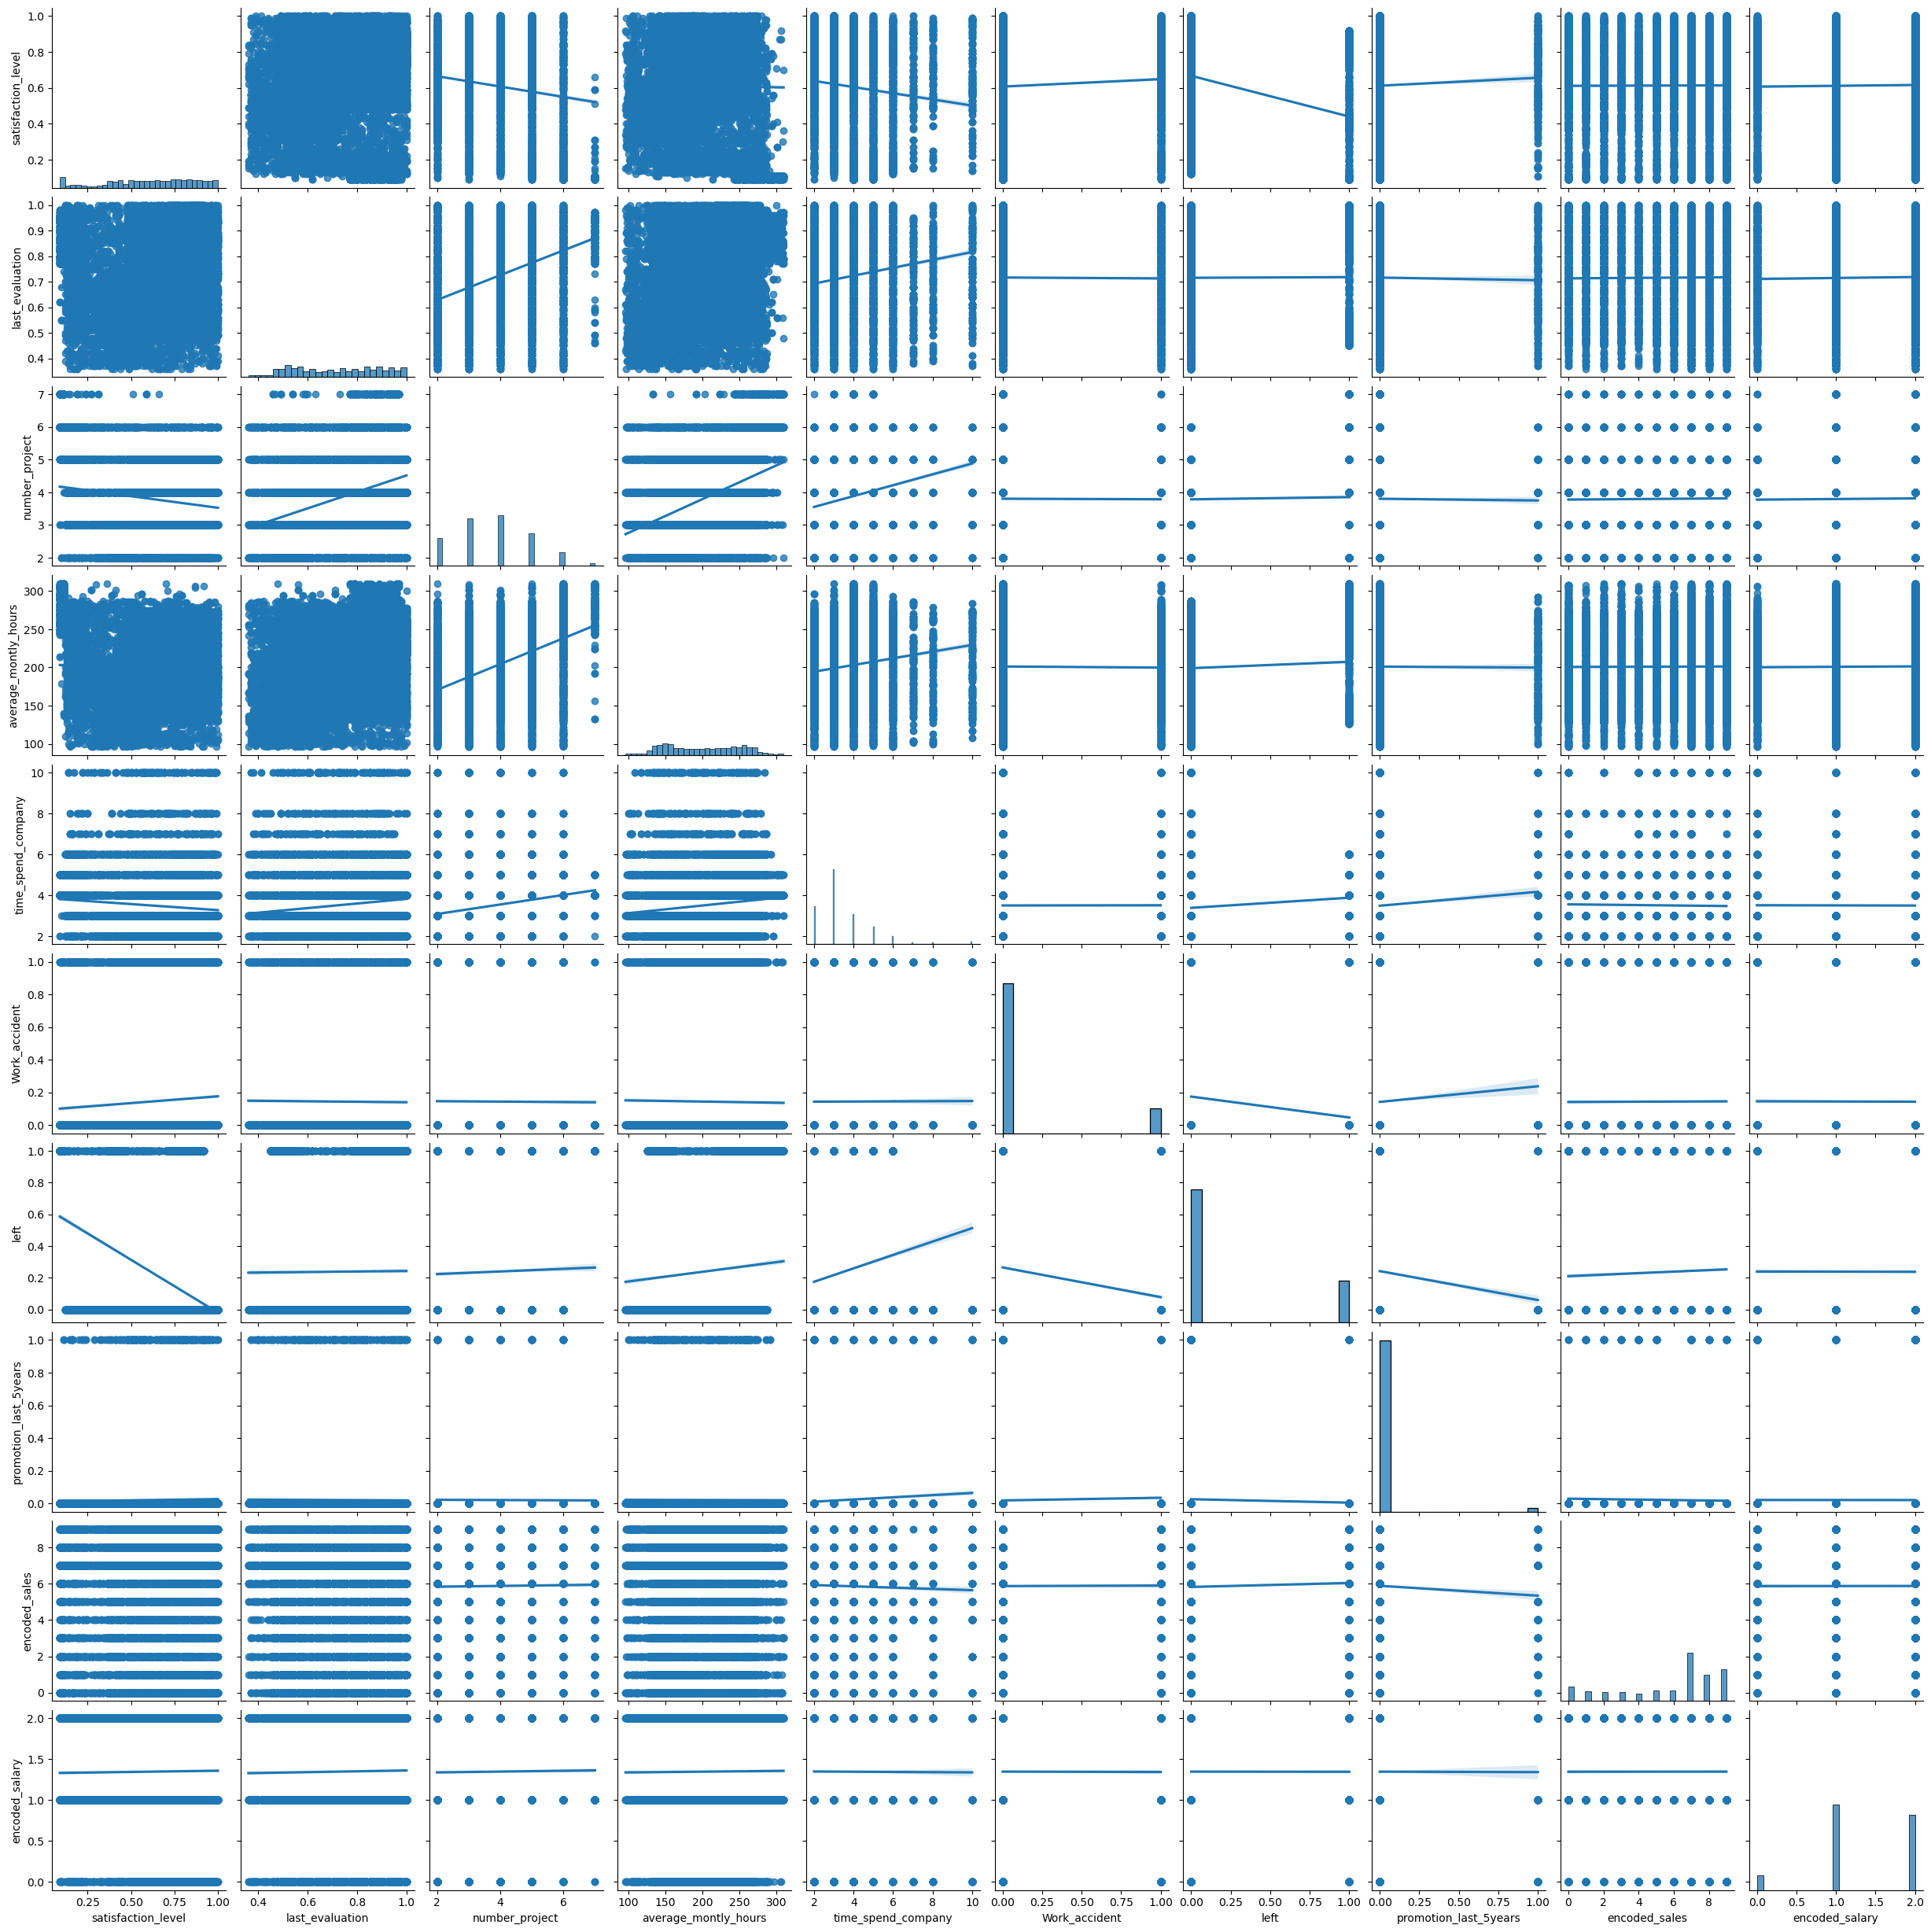

In [14]:
sns.pairplot(data=df,kind='reg')

Text(0.5, 1.0, 'Encoded_salary as per average_montly_hours & last_evaluation')

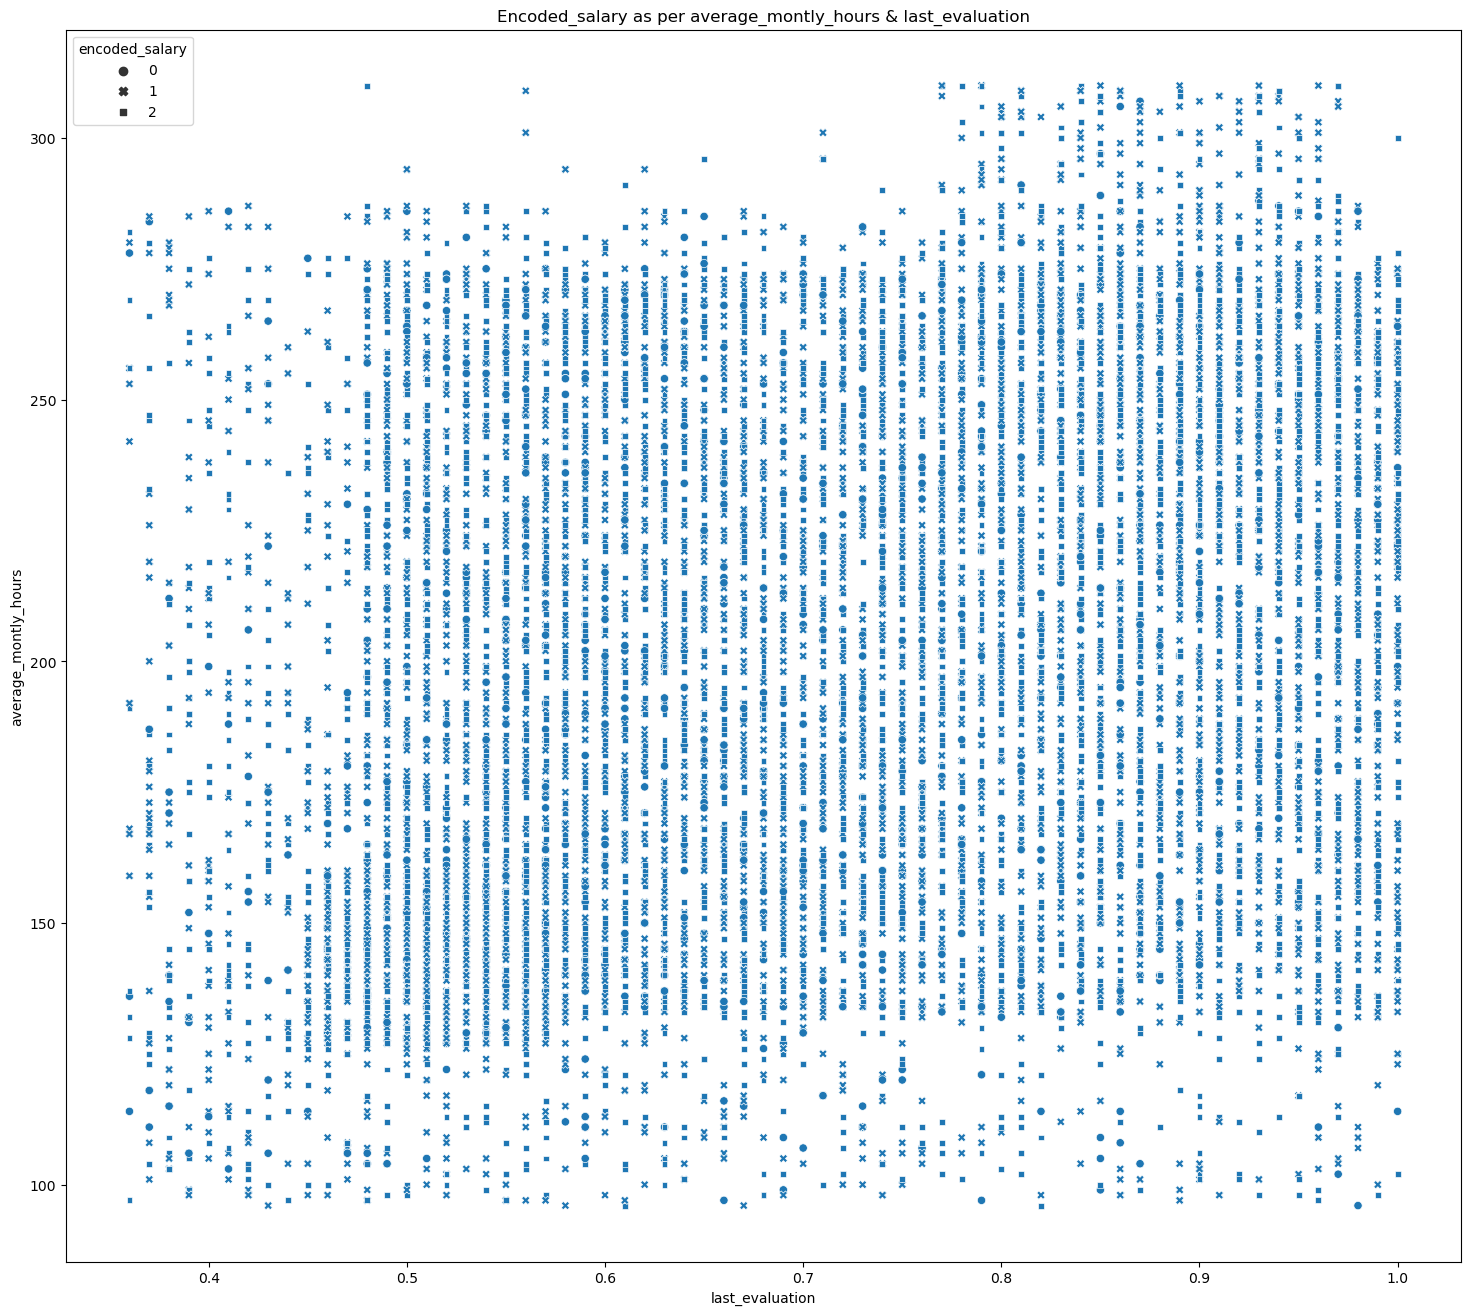

In [15]:
plt.figure(figsize=(18,16))
sns.scatterplot(data=df,x='last_evaluation',y='average_montly_hours',style='encoded_salary')
plt.title("Encoded_salary as per average_montly_hours & last_evaluation", loc='center')

In [16]:
fig = px.histogram(df, x='satisfaction_level', nbins=30, title='Distribution of  Satisfaction Level', labels={'satisfaction_level': 'Satisfaction Level'}, color_discrete_sequence=['skyblue'])
fig.update_layout(yaxis_title='Frequency')
fig.show()

In [17]:
round(df.describe(),2)

satisfaction_level  last_evaluation  number_project  \
count            14999.00         14999.00        14999.00   
mean                 0.61             0.72            3.80   
std                  0.25             0.17            1.23   
min                  0.09             0.36            2.00   
25%                  0.44             0.56            3.00   
50%                  0.64             0.72            4.00   
75%                  0.82             0.87            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  Work_accident      left  \
count              14999.00            14999.00       14999.00  14999.00   
mean                 201.05                3.50           0.14      0.24   
std                   49.94                1.46           0.35      0.43   
min                   96.00                2.00           0.00      0.00   
25%                  156.00                3.00           0.00      0.00   
50%                  200.00                3.00           0.00      0.00   
75%                  245.00                4.00           0.00      0.00   
max                  310.00               10.00           1.00      1.00   

       promotion_last_5years  encoded_sales  encoded_salary  
count               14999.00       14999.00        14999.00  
mean                    0.02           5.87            1.35  
std                     0.14           2.87            0.63  
min                     0.00           0.00            0.00  
25%                     0.00           4.00            1.00  
50%                     0.00           7.00            1.00  
75%                     0.00           8.00            2.00  
max                     1.00           9.00            2.00

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



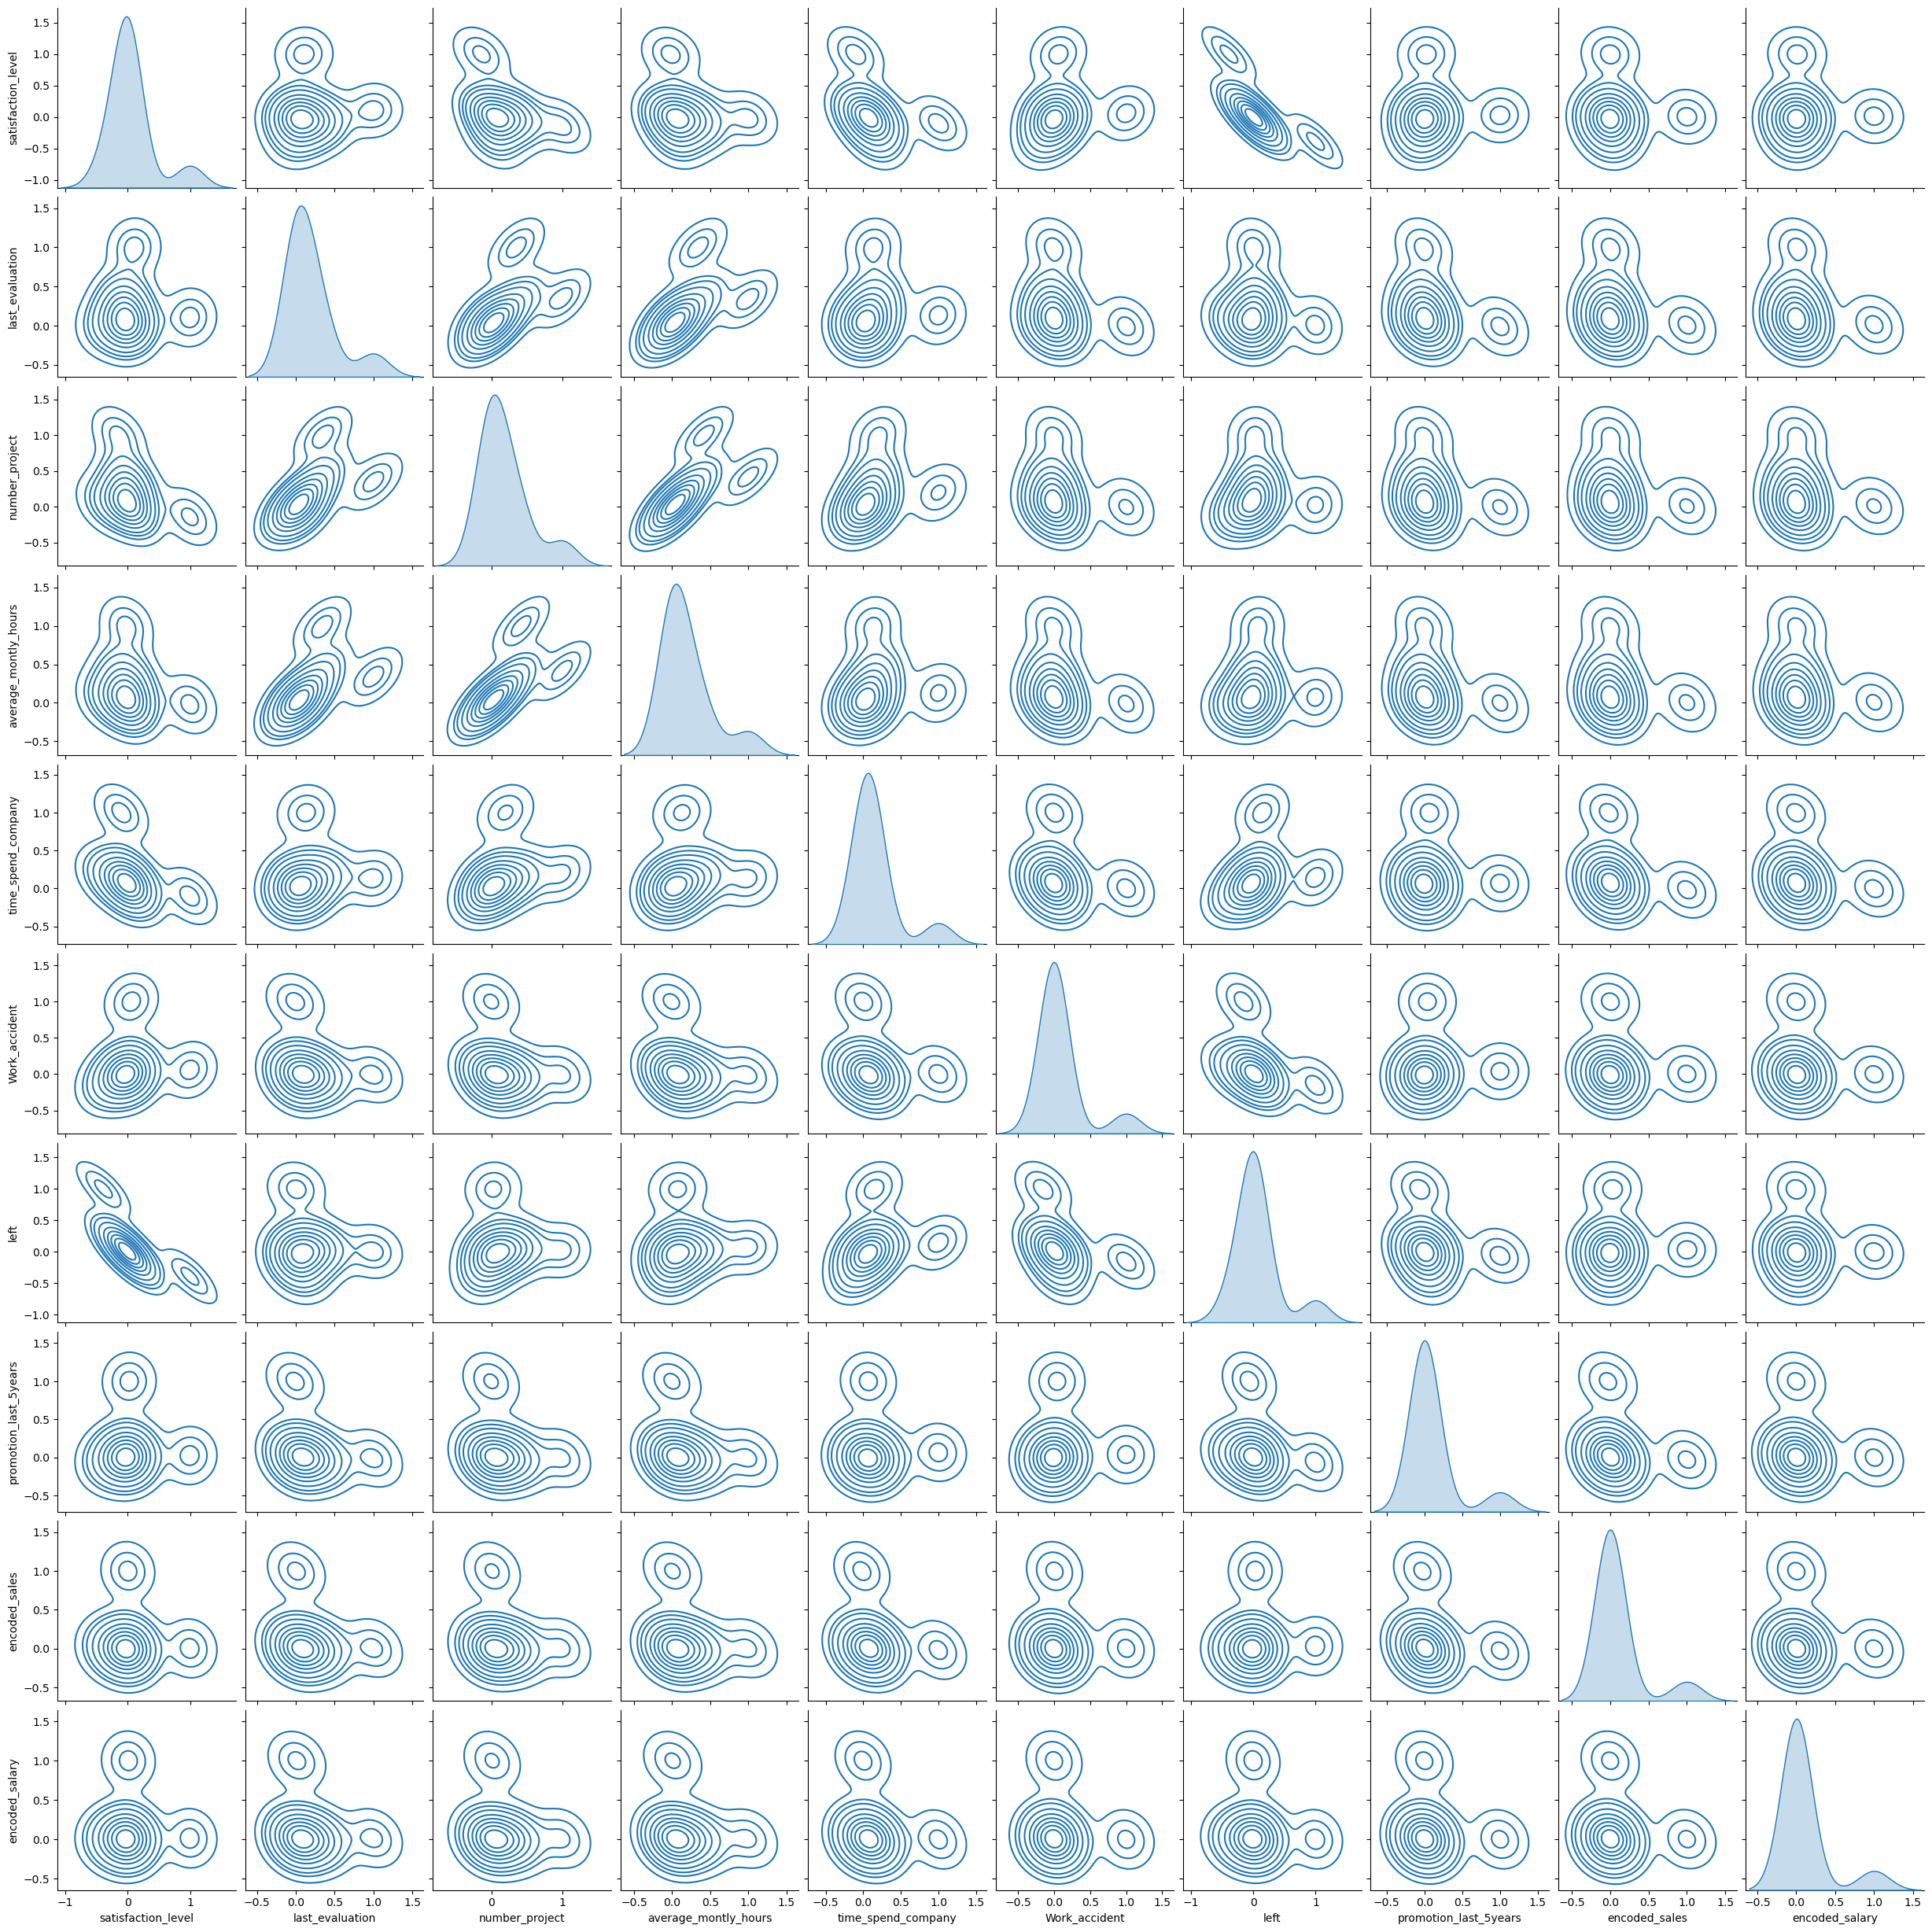

In [18]:
sns.pairplot(df.corr(),kind='kde')

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['left'], axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((11999, 9), (3000, 9))

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy : ",accuracy_score(y_test, y_pred)*100)
print("Classification Report : ", classification_report(y_test, y_pred))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred))

Accuracy :  99.23333333333333
Classification Report :                precision    recall  f1-score   support

           0       0.99      1.00      1.00      2299
           1       0.99      0.98      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix :  [[2293    6]
 [  17  684]]


In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   3.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   4.5s
[CV] END max_depth=None, 